# Project 4: Stock

## Week 1: 11/10/21-11/19/21
Below is the data for my initial purchases. 


| Symbol | Company | Description | Purchase Price | Quantity | Total Value |
| :--- | :--- | :--- | :--- | :--- | :--- |
| ABBV | Abbvie Inc | Biopharmaceutical | 116.94 | 20 | 2338.80 |
| ABC | Amerisourcebergen Corp. | Drug wholesale | 125.10 | 20 | 2502.00 |
| COST | Costco Wholesale Corp | Retail| 517.01 | 100 | 51701.00 |
| DELL | Dell Technologies Inc | Computer Technology | 56.73 | 100 | 5673.00 |
| PSN | Parsons Corp|Engineering Technology | 36.77 | 20 | 735.40 |
| SPOT | Spotify Technology S.A. | Music Streaming | 275.10 | 20 | 5502.00 |
| TM | Toyota Motor Crp | Automotive Manufacturer | 178.47 | 50 | 8923.50|
| WMT | Walmart Inc | Retail | 148.77 | 50 | 7438.50 |
| | | | | Total Spent | 84814.20 |

#### Log

On Friday-Monday I focused more on researching stock simulation methods, gathering data, and diagrams than simulations.  However, I attempted to run a Monte Carlo Simulation (as shown later)

In [29]:
#setup
!pip install pandas_datareader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime

#yahoo finance
from pandas_datareader.data import DataReader

In [30]:
#stock abbrev to analyze
list = ['ABBV','ABC','COST','DELL','PSN','SPOT','TM','WMT']

#setting up what dates to gather: from last yr - current yr
stop = datetime.now()
start = datetime(stop.year-1, stop.month, stop.day)

for stock in list:
    globals()[stock] = DataReader(stock, 'yahoo', start, stop)

### ABBV Table

In [31]:
ABBV.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,111.493043,109.566798,110.532174,110.573241,6.927901e+06,107.944213
std,4.967509,5.076170,5.054296,5.030259,3.935807e+06,5.989057
min,100.150002,98.589996,98.760002,98.720001,1.378600e+06,94.201591
25%,107.529999,105.559998,106.480003,106.709999,5.116000e+06,103.007172
50%,110.580002,108.360001,109.580002,109.510002,6.237600e+06,107.783287
75%,116.180000,114.260002,115.250000,115.400002,7.615600e+06,113.131927
max,121.529999,120.150002,121.000000,120.779999,5.094320e+07,119.333267


#### Definitions

**High** - highest price stock traded during a period.

**Low** - lowest price stock traded during a period.

**Open** - price at which a stock started trading when the opening bell rang

**Close** - price of an individual stock when stock exchange closed

**Adj Close** - (adjusted close) closing price after adjustments for applicable splits and dividend distributions.



Below are the diagrams for ABBV, ABC, COST, DELL, PSN, SPOT, TM, and WMT adj close stocj value.  I decided to use value as I felt it best represented the stock value over the course of the year. 

Text(0.5, 1.0, 'Abbvie Adj Close')

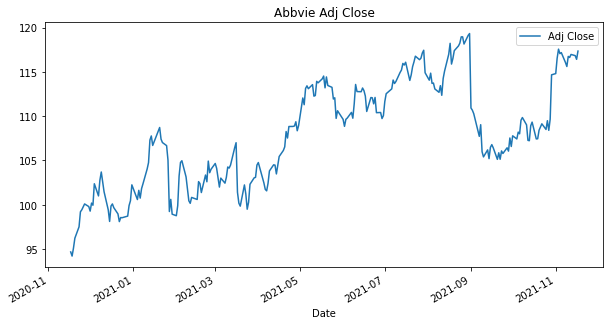

In [32]:
ABBV['Adj Close'].plot(legend = 1, figsize=(10,5))
plt.title('Abbvie Adj Close')

Text(0.5, 1.0, 'Amerisourcebergen Adj Close')

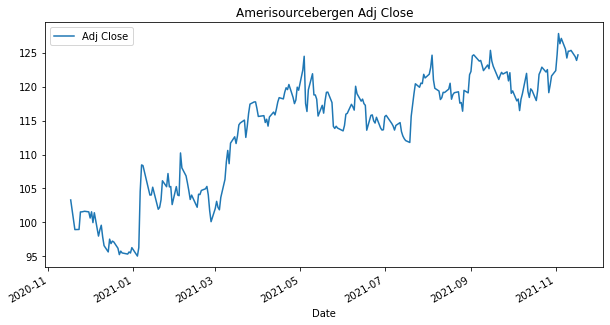

In [33]:
ABC['Adj Close'].plot(legend = 1, figsize=(10,5))
plt.title('Amerisourcebergen Adj Close')

Text(0.5, 1.0, 'Costco Adj Close')

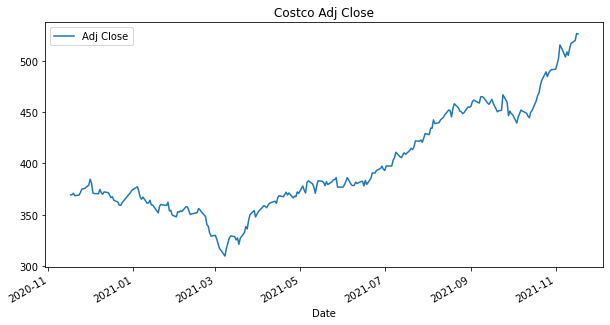

In [34]:
COST['Adj Close'].plot(legend = 1, figsize=(10,5))
plt.title('Costco Adj Close')

Text(0.5, 1.0, 'Dell Adj Close')

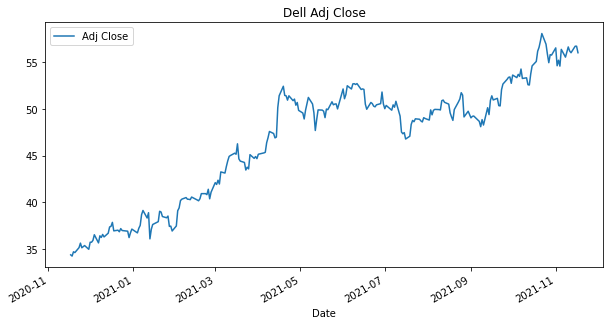

In [35]:
DELL['Adj Close'].plot(legend = 1, figsize=(10,5))
plt.title('Dell Adj Close')

Text(0.5, 1.0, 'Parsons Adj Close')

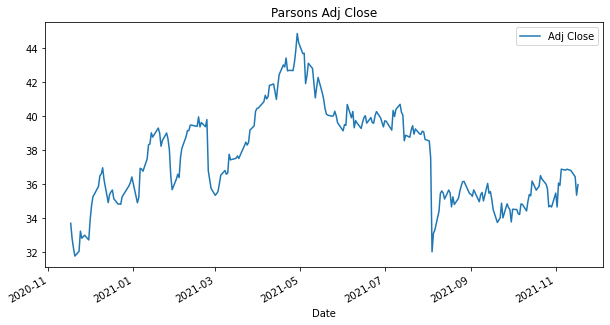

In [36]:
PSN['Adj Close'].plot(legend = 1, figsize=(10,5))
plt.title('Parsons Adj Close')

Text(0.5, 1.0, 'Spotify Adj Close')

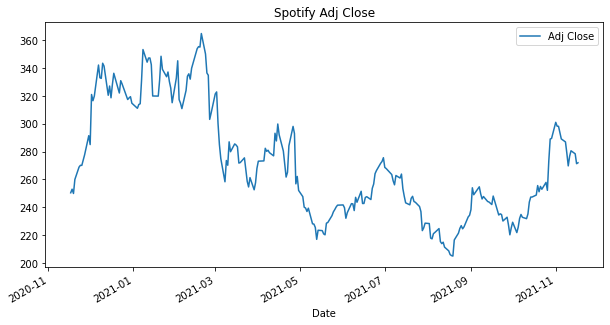

In [37]:
SPOT['Adj Close'].plot(legend = 1, figsize=(10,5))
plt.title('Spotify Adj Close')

Text(0.5, 1.0, 'Toyota Adj Close')

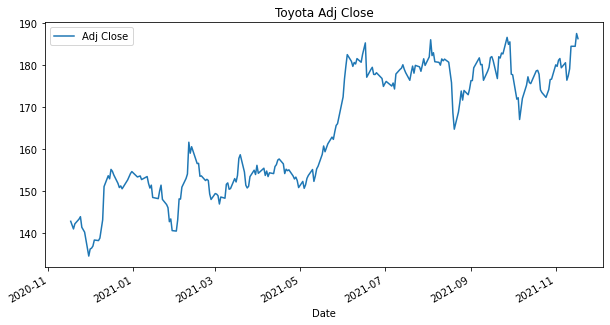

In [38]:
TM['Adj Close'].plot(legend = 1, figsize=(10,5))
plt.title('Toyota Adj Close')

Text(0.5, 1.0, 'Walmart Adj Close')

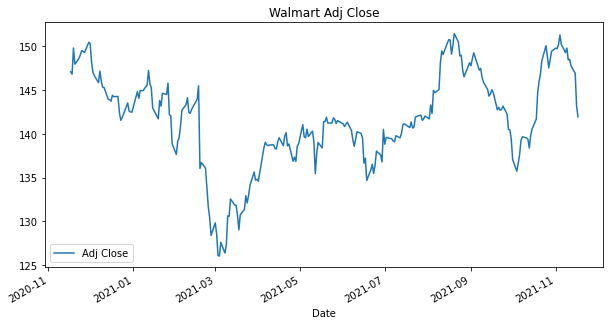

In [39]:
WMT['Adj Close'].plot(legend = 1, figsize=(10,5))
plt.title('Walmart Adj Close')

### Pre-simulation 

Even without starting a simulation I can tell from my graphs that SPOT and PSN were not good investments.  I decided to use the sell value to buy more Costco stock.  I also did this because I was unsure when I would be able to complete my simulations and I needed to complete my weekly three trades.  

#### Trades

| Symbol | Company | Description | Purchase Price | Quantity | Total Value |
| :--- | :--- | :--- | :--- | :--- | :--- |
| COST | Costco Wholesale Corp | Retail | 519.84 | 383 | 199097.34 |


| Symbol | Company | Description | Sell Price | Quantity | Total Value |
| :--- | :--- | :--- | :--- | :--- | :--- |
| PSN | Parsons Corp|Engineering Technology | 35.35 | 20 | 707.00 |
| SPOT | Spotify Technology S.A. | Music Streaming | 275.10 | 20 | 5502.00 |

## Attempt 1

### Monte Carlo Simulation with GBM

I attempted to create a Monte Carlo Simulation outlined here https://www.investopedia.com/articles/07/montecarlo.asp.  Essentially this is one of the most common ways to estimate risk.  

#### Definitions

**GBM** - geometric Brownian motion (aka the Markov process).  The stock will follow a random walk and the efficient market hypothesis (EMH).

**EMH** - next price movement is conditionally independent of past price movements.  Essentially you cannot perfectly predict the future based on past stock prices.  

**Quantile** - sample is divided into equal sized subgroups


#### The formula for GBM is:

**ΔS/S = μΔt + σϵ**

where:

S = stock price

ΔS = change in stock price

μ = expected return

σ = standard deviation of returns

ϵ = random variable

Δt = elapsed time period

So I rearragne the formula to solve for change in stock prices:

**ΔS = S(μΔt + σϵ)**

In [40]:
#all closing prices into one data frame
closing = DataReader(['ABBV','ABC','COST','DELL','TM','WMT'], 'yahoo', start, stop)['Adj Close']

#check
closing.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-11-17 to 2021-11-17
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ABBV    253 non-null    float64
 1   ABC     253 non-null    float64
 2   COST    253 non-null    float64
 3   DELL    253 non-null    float64
 4   TM      253 non-null    float64
 5   WMT     253 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


#### Definitions

**drift** - average daily return multiplied by the change of time.

**shock** - randomly push the price up and down

**risk** - chance an investment will differ from expected outcome

In [41]:
#daily returns as a percentage
daily = closing.pct_change()

#risk
risk = daily.dropna()

#time and delta value
#set days to 7 since i will be selling within a week
days = 7
delta = 1/days

def monte_carlo(mu, sig, days, start):
    #define price array
    price = np.zeros(days) ##array full of 0s
    price[0] = start
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    #calculations for the price array for the number of days
    for x in range(1,days):
        shock[x] = np.random.normal(loc = mu * delta, scale = sig * np.sqrt(delta))
        drift[x] = mu * delta
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
    return price
    

Text(0.5, 1.0, 'MC for Abbvie Inc')

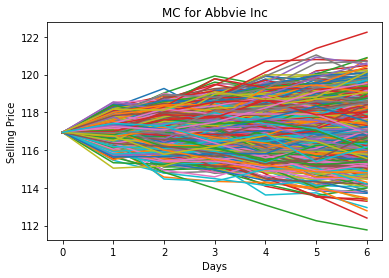

In [42]:
#for ABBV
mu = daily.mean()['ABBV']
sig = daily.std()['ABBV']
start = 116.94 #initial price

simulations = np.zeros(1000)

for run in range(1000):
    simulations[run] = monte_carlo(mu,sig,days,start)[days-1]
    plt.plot(monte_carlo(mu,sig,days,start))
    
#plot
plt.xlabel('Days') 
plt.ylabel('Selling Price')
plt.title('MC for Abbvie Inc')    

Text(0.5, 1.0, 'Final price for Abbvie after 7 days')

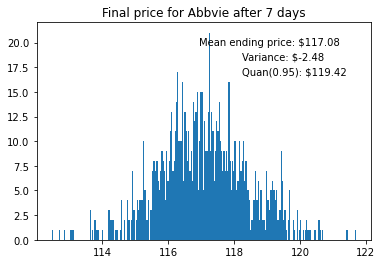

In [43]:
#95 percentile
quant = np.percentile(simulations,95)

#plot end prices
plt.hist(simulations, bins = 250)

#mean ending 
#$%.2f special two after point
plt.figtext(0.5, 0.80, 'Mean ending price: $%.2f'%simulations.mean())

#variance
plt.figtext(0.6, 0.75, 'Variance: $%.2f'%(start-quant,))

#5% 
plt.figtext(0.6, 0.70, 'Quan(0.95): $%.2f'% quant)

#after string /s
plt.title('Final price for Abbvie after %s days' %days)

Text(0.5, 1.0, 'MC for Amerisourcebergen')

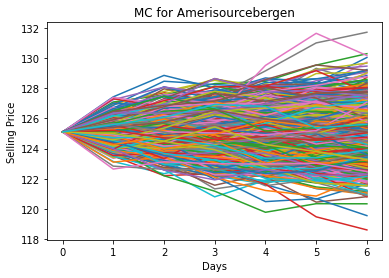

In [44]:
#for ABC
mu = daily.mean()['ABC']
sig = daily.std()['ABC']
start = 125.10 #initial price

simulations = np.zeros(1000)

for run in range(1000):
    simulations[run] = monte_carlo(mu,sig,days,start)[days-1]
    plt.plot(monte_carlo(mu,sig,days,start))
    
#plot
plt.xlabel('Days') 
plt.ylabel('Selling Price')
plt.title('MC for Amerisourcebergen')    

Text(0.5, 1.0, 'Final price for Amerisourcebergen after 7 days')

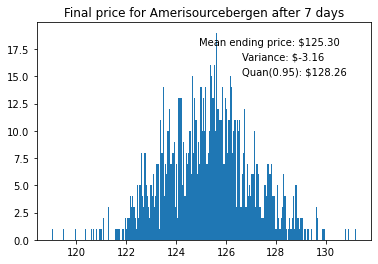

In [45]:
#95 percentile
quant = np.percentile(simulations,95)

#plot end prices
plt.hist(simulations, bins = 250)

#mean ending 
#$%.2f special two after point
plt.figtext(0.5, 0.80, 'Mean ending price: $%.2f'%simulations.mean())

#variance
plt.figtext(0.6, 0.75, 'Variance: $%.2f'%(start-quant,))

#5% 
plt.figtext(0.6, 0.70, 'Quan(0.95): $%.2f'% quant)

#after string /s
plt.title('Final price for Amerisourcebergen after %s days' %days)

Text(0.5, 1.0, 'MC for Costco')

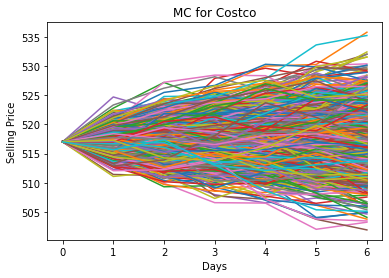

In [46]:
#for COST
mu = daily.mean()['COST']
sig = daily.std()['COST']
start = 517.01 #initial price

simulations = np.zeros(1000)

for run in range(1000):
    simulations[run] = monte_carlo(mu,sig,days,start)[days-1]
    plt.plot(monte_carlo(mu,sig,days,start))
    
#plot
plt.xlabel('Days') 
plt.ylabel('Selling Price')
plt.title('MC for Costco')    

Text(0.5, 1.0, 'Final price for Costco after 7 days')

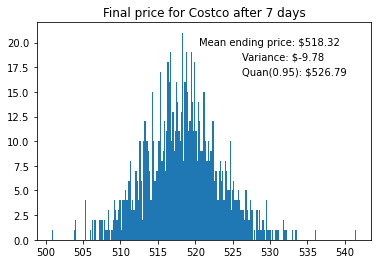

In [47]:
#95 percentile
quant = np.percentile(simulations,95)

#plot end prices
plt.hist(simulations, bins = 250)

#mean ending 
#$%.2f special two after point
plt.figtext(0.5, 0.80, 'Mean ending price: $%.2f'%simulations.mean())

#variance
plt.figtext(0.6, 0.75, 'Variance: $%.2f'%(start-quant,))

#5% 
plt.figtext(0.6, 0.70, 'Quan(0.95): $%.2f'% quant)

#after string /s
plt.title('Final price for Costco after %s days' %days)

Text(0.5, 1.0, 'MC for Dell')

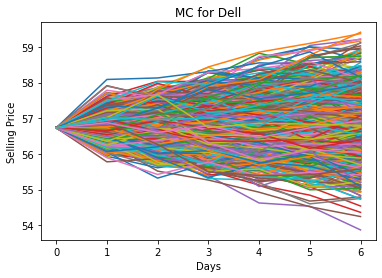

In [48]:
#for Dell
mu = daily.mean()['DELL']
sig = daily.std()['DELL']
start = 56.73 #initial price

simulations = np.zeros(1000)

for run in range(1000):
    simulations[run] = monte_carlo(mu,sig,days,start)[days-1]
    plt.plot(monte_carlo(mu,sig,days,start))
    
#plot
plt.xlabel('Days') 
plt.ylabel('Selling Price')
plt.title('MC for Dell')    

Text(0.5, 1.0, 'Final price for Dell after 7 days')

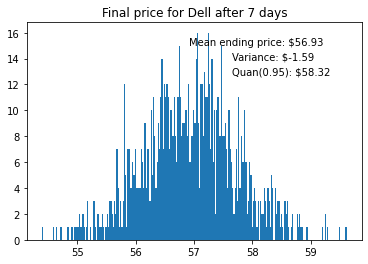

In [49]:
#95 percentile
quant = np.percentile(simulations,95)

#plot end prices
plt.hist(simulations, bins = 250)

#mean ending 
#$%.2f special two after point
plt.figtext(0.5, 0.80, 'Mean ending price: $%.2f'%simulations.mean())

#variance
plt.figtext(0.6, 0.75, 'Variance: $%.2f'%(start-quant,))

#5% 
plt.figtext(0.6, 0.70, 'Quan(0.95): $%.2f'% quant)

#after string /s
plt.title('Final price for Dell after %s days' %days)

Text(0.5, 1.0, 'MC for Toyota')

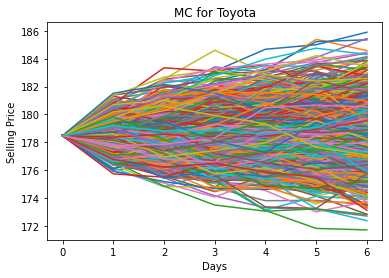

In [50]:
#for TM
mu = daily.mean()['TM']
sig = daily.std()['TM']
start = 178.47 #initial price

simulations = np.zeros(1000)

for run in range(1000):
    simulations[run] = monte_carlo(mu,sig,days,start)[days-1]
    plt.plot(monte_carlo(mu,sig,days,start))
    
#plot
plt.xlabel('Days') 
plt.ylabel('Selling Price')
plt.title('MC for Toyota')    

Text(0.5, 1.0, 'Final price for Toyota after 7 days')

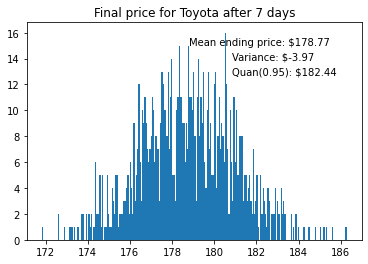

In [51]:
#95 percentile
quant = np.percentile(simulations,95)

#plot end prices
plt.hist(simulations, bins = 250)

#mean ending 
#$%.2f special two after point
plt.figtext(0.5, 0.80, 'Mean ending price: $%.2f'%simulations.mean())

#variance
plt.figtext(0.6, 0.75, 'Variance: $%.2f'%(start-quant,))

#5% 
plt.figtext(0.6, 0.70, 'Quan(0.95): $%.2f'% quant)

#after string /s
plt.title('Final price for Toyota after %s days' %days)

Text(0.5, 1.0, 'MC for Walmart')

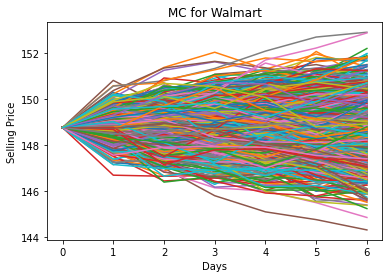

In [52]:
#for WMT
mu = daily.mean()['WMT']
sig = daily.std()['WMT']
start = 148.77 #initial price

simulations = np.zeros(1000)

for run in range(1000):
    simulations[run] = monte_carlo(mu,sig,days,start)[days-1]
    plt.plot(monte_carlo(mu,sig,days,start))
    
#plot
plt.xlabel('Days') 
plt.ylabel('Selling Price')
plt.title('MC for Walmart')    

Text(0.5, 1.0, 'Final price for Walmart after 7 days')

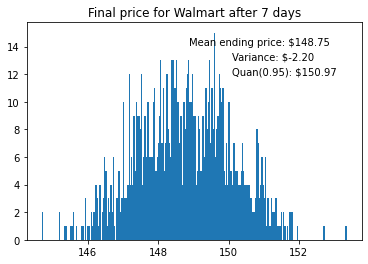

In [53]:
#95 percentile
quant = np.percentile(simulations,95)

#plot end prices
plt.hist(simulations, bins = 250)

#mean ending 
#$%.2f special two after point
plt.figtext(0.5, 0.80, 'Mean ending price: $%.2f'%simulations.mean())

#variance
plt.figtext(0.6, 0.75, 'Variance: $%.2f'%(start-quant,))

#5% 
plt.figtext(0.6, 0.70, 'Quan(0.95): $%.2f'% quant)

#after string /s
plt.title('Final price for Walmart after %s days' %days)

### Conclusion

| Symbol | Company | Description | Mean Ending Price | Approx. Risk | Loss/Gain per stock|
| :--- | :--- | :--- | :--- | :--- | :--- |
| ABBV | Abbvie Inc | Biopharmaceutical | 117.17 | 6 | +0.23 |
| ABC | Amerisourcebergen Corp. | Drug wholesale | 125.36 | 8 | +0.26 |
| COST | Costco Wholesale Corp | Retail| 518.17 | 25 | +1.16 |
| DELL | Dell Technologies Inc | Computer Technology | 56.94 | 4 | +.21 |
| TM | Toyota Motor Crp | Automotive Manufacturer | 178.82 | 10 | +.35 |
| WMT | Walmart Inc | Retail | 148.73 | 6 | -.04 |
| | | | Total  Gain/Loss per stock | +2.17 |


Since I was able to complete this simulation on time. I used this prediction to sell my Walmart stock for more Costco and Toyota stock.

**Sell**

| Symbol | Company | Description | Sell Price | Quantity | Total Value |
| :--- | :--- | :--- | :--- | :--- | :--- |
| WMT | Walmart Inc | Retail | 141.94 | 50 | 7097.00 |

**Buy**

| Symbol | Company | Description | Purchase Price | Quantity | Total Value |
| :--- | :--- | :--- | :--- | :--- | :--- |
| COST | Costco Wholesale Corp | Retail| 526.29 | 2 | 1052.58 |
| TM | Toyota Motor Crp | Automotive Manufacturer | 186.21 | 25 | 4655.25 |
| | | | Total | 5707.83 |

Because I sold the WLMT stock for less than I bought it for, I decided not to spend all of it in case something similar happens in the future.  

I realize this code isn't the most clean, however I am still new to python.  I look forward to seeing how the rest of you set up your simulations.

## Week 2: 11/20/21-11/26/21

## Week 3: 11/27/21-12/03/21